In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow.keras as keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]


In [5]:
plt.rcParams['figure.figsize'] = [6,6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [6]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
np.shape(x_train)

(60000, 28, 28)

In [8]:
single_image = x_train[0,:,:]

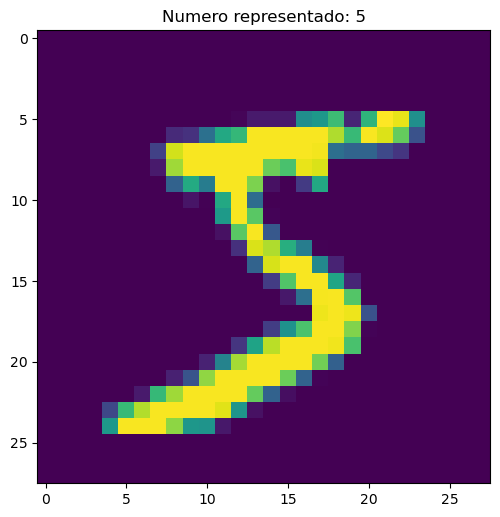

In [9]:
plt.title(f"Numero representado: {y_train[0]}")
plt.imshow(single_image)

In [10]:
y_cat_test = to_categorical(y_test)

In [11]:
y_cat_train = to_categorical(y_train)

In [12]:
x_train=x_train/255
x_test=x_test/255

In [13]:
scaled_image = x_train[0]

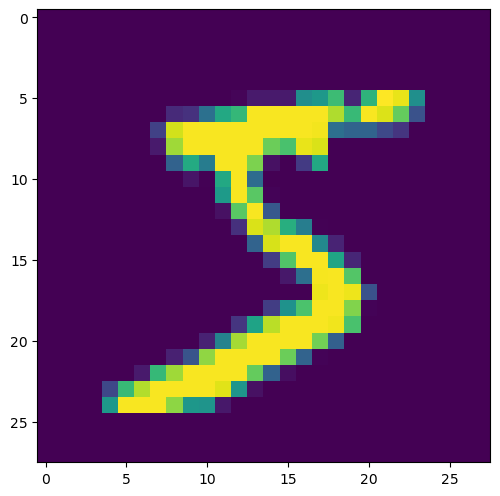

In [14]:
plt.imshow(scaled_image)

In [15]:
x_train = x_train.reshape(60000,28,28,1)

In [16]:
x_test = x_test.reshape(10000,28,28,1)

In [17]:
model = Sequential()
model.add(Conv2D(filters=32
                 ,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
early_stop = EarlyStopping(monitor="val_loss",patience=1)
model.fit(x_train,y_cat_train,epochs=3,batch_size=500,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 20s 336us/sample - loss: 0.3879 - accuracy: 0.8928 - val_loss: 0.1558 - val_accuracy: 0.9561
Epoch 2/3
60000/60000 [==============================] - 19s 309us/sample - loss: 0.1250 - accuracy: 0.9650 - val_loss: 0.0803 - val_accuracy: 0.9758
Epoch 3/3
60000/60000 [==============================] - 18s 300us/sample - loss: 0.0751 - accuracy: 0.9786 - val_loss: 0.0622 - val_accuracy: 0.9798


In [18]:
metrics = pd.DataFrame(model.history.history)

In [19]:
model.history.history

{'loss': [0.38790492912133534, 0.12498398770888647, 0.07506969459354877],
 'accuracy': [0.89283335, 0.96503335, 0.97861665],
 'val_loss': [0.15579788582399487, 0.08032121248543263, 0.06215470538008958],
 'val_accuracy': [0.9561, 0.9758, 0.9798]}

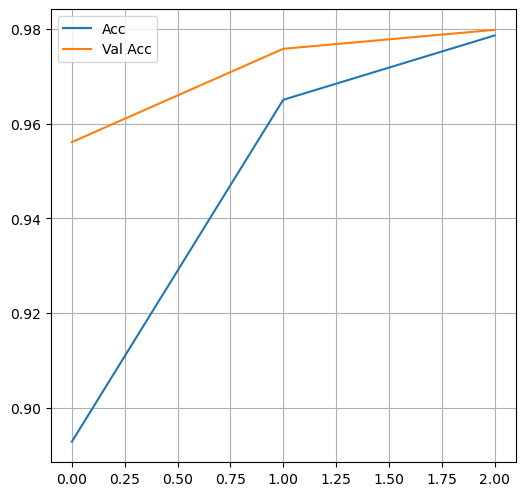

In [20]:
plt.plot(metrics.accuracy)
plt.plot(metrics.val_accuracy)
plt.grid(True)
plt.legend(["Acc","Val Acc"])

In [21]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.97      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [24]:
print(confusion_matrix(y_test,predictions))

[[ 978    0    0    0    0    1    0    1    0    0]
 [   0 1125    2    1    0    0    5    1    1    0]
 [   8    4  999    2    2    0    1   12    3    1]
 [   0    0    1  991    0    9    0    5    3    1]
 [   1    0    6    0  950    0    2    1    2   20]
 [   2    0    0    2    0  885    2    0    0    1]
 [  11    3    0    0    2    4  934    1    3    0]
 [   1    1    9    2    0    0    0 1012    2    1]
 [   7    0    2    3    1    3    0    7  947    4]
 [   7    4    1    2    4    4    0    9    1  977]]
